In [1]:
%%capture
!pip install ucimlrepo seaborn

In [31]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

WINE_CLASS_NAMES = {1: 'Barolo', 2: 'Grignolino', 3: 'Barbera'}
## Class name taken from the following:
## Forina, M., Armanino, C., Castino, M., Ubigli, M., 1986. Multivariate data analysis as a discriminating method of the origin of wines. VITIS - Journal of Grapevine Research 25, 189–189.
wine.data.targets['class'] = wine.data.targets['class'].map(WINE_CLASS_NAMES)
wine.data.original['class'] = wine.data.original['class'].map(WINE_CLASS_NAMES)

/var/folders/rs/z4yf99dx0wx_lqfdhc3l3dt40000gn/T/ipykernel_43738/717861491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine.data.targets['class'] = wine.data.targets['class'].map(WINE_CLASS_NAMES)


In [41]:
from IPython.display import display
import pandas as pd

FEATURES_TO_DISPLAY_1 = ['Alcohol', 'Malicacid', 'Magnesium']
FEATURES_TO_DISPLAY_2 = ['Flavanoids', 'Hue']
with pd.option_context('display.max_columns', len(FEATURES_TO_DISPLAY_1) + len(FEATURES_TO_DISPLAY_2) + 1):
    other_cols = list(set(wine.data.original.columns) - set(FEATURES_TO_DISPLAY) - set(FEATURES_TO_DISPLAY_1) - {'class'})
    ## スライドのために一部カラムのみ表示
    display(wine.data.original[FEATURES_TO_DISPLAY_1 + other_cols + FEATURES_TO_DISPLAY_2 + ['class']].sample(5, random_state=42))

,Alcohol,Malicacid,Magnesium,...,Flavanoids,Hue,class
19,13.64,3.10,116,...,3.03,0.96,Barolo
45,14.21,4.04,111,...,2.65,0.87,Barolo
140,12.93,2.81,96,...,0.50,0.77,Barbera
30,13.73,1.50,101,...,3.25,1.19,Barolo
67,12.37,1.17,78,...,2.00,1.12,Grignolino


In [34]:
wine.metadata

{'uci_id': 109,
 'name': 'Wine',
 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine',
 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv',
 'abstract': 'Using chemical analysis to determine the origin of wines',
 'area': 'Physics and Chemistry',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 178,
 'num_features': 13,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1992,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C5PC7J',
 'creators': ['Stefan Aeberhard', 'M. Forina'],
 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings',
  'authors': 'S. Aeberhard, D. Coomans, O. Vel',
  'published_in': 'Pattern Recognition',
  'year': 1994,
  'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdb

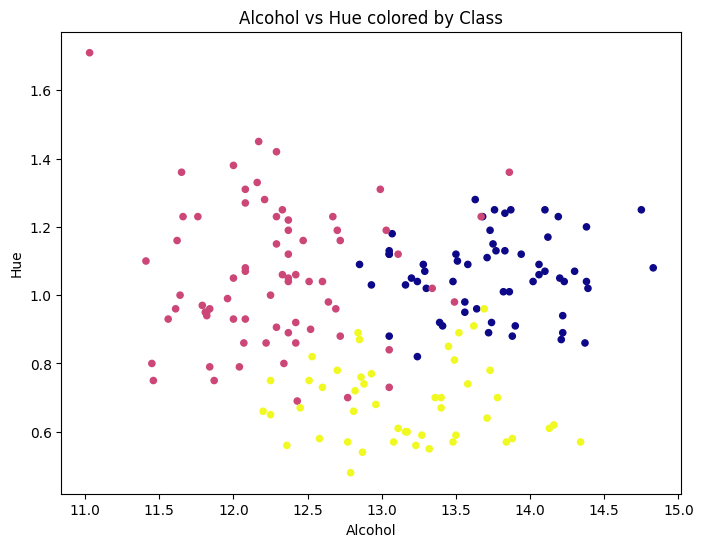

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

fig_dir = Path('figures/1/')
fig_dir.mkdir(exist_ok=True, parents=True)

# AlcoholとHueの散布図を描画し、classでカラーリング
wine.data.original.plot.scatter(x='Alcohol', y='Hue', c='class', cmap='plasma', figsize=(8, 6), colorbar=False)
plt.title('Alcohol vs Hue colored by Class')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.savefig(fig_dir / '1_1_scatter.png')
plt.show()

In [69]:
import itertools
CLASSES = ['Barolo', 'Barbera', 'Grignolino']

pd.DataFrame([
    {'$y_{\text{pred}}$': y_pred, '$y_{\text{true}}$': y_true, '$\ell(y_{\text{pred}}, y_{\text{true}})$': 0 if y_pred == y_true else 1}
    for y_pred, y_true in itertools.product(CLASSES, CLASSES)
])

,$y_{\text{pred}}$,$y_{\text{true}}$,"$\ell(y_{\text{pred}}, y_{\text{true}})$"
0,Barolo,Barolo,0
1,Barolo,Barbera,1
2,Barolo,Grignolino,1
3,Barbera,Barolo,1
4,Barbera,Barbera,0
5,Barbera,Grignolino,1
6,Grignolino,Barolo,1
7,Grignolino,Barbera,1
8,Grignolino,Grignolino,0
